In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
BES = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.3.dta")
#print(BES.describe())
# 31409 rows × 733 columns

In [3]:
BES.dtypes.value_counts()

category          664
object             33
float64            20
int8                8
datetime64[ns]      6
int32               1
int16               1
dtype: int64

In [4]:
category_features = BES.columns[BES.dtypes=="category"]
category_features

Index(['country', 'generalElectionVote', 'generalElectionVoteW9', 'partyId',
       'partyIdSqueeze', 'partyIdEU', 'partyIdW9', 'partyIdSqueezeW9',
       'partyIdEUretroW9', 'countryOfBirth',
       ...
       'polKnowOsborne', 'polKnowMay', 'polKnowBercow', 'subjectHE',
       'subjectHECurrent', 'edlevel', 'profile_turnout_2015',
       'profile_past_vote_2015', 'lr_scale', 'al_scale'],
      dtype='object', length=664)

In [5]:
a = BES[category_features].stack().value_counts()

In [6]:
t = [s for s in list(a.keys()) if isinstance(s,str) and "no".lower() in s.lower()]
a[t]

No                                                                     1140530
Don't know                                                             1059162
Neither agree nor disagree                                              260570
No formal qualifications                                                 60407
Neither united nor divided                                               51231
None, no time at all                                                     34715
Neither good nor bad for Britain                                         33325
No, not at any level                                                     23102
No, did not vote                                                         22181
Not at all certain                                                       21933
North West                                                               20773
Not gone far enough                                                      19635
No, I have never been a member                      

In [7]:
# Candidate generic "non-answers#
# Don't know 1059162
# Prefer not to answer    9670
# Prefer not to say       2122



In [8]:
# def remove_dont_know(val):
#     if (val == "Don't know") or (val == "Prefer not to answer") or (val == "Prefer not to say"):
#         val = np.nan.astype('category')
#     return val

In [9]:
BES[category_features].dtypes

country                         category
generalElectionVote             category
generalElectionVoteW9           category
partyId                         category
partyIdSqueeze                  category
partyIdEU                       category
partyIdW9                       category
partyIdSqueezeW9                category
partyIdEUretroW9                category
countryOfBirth                  category
ukCitizen                       category
euCitizen                       category
commonwealthCitizen             category
otherCitizen                    category
mii                             category
bestOnMII                       category
postalapply                     category
postalTurnout                   category
euRefVotePost                   category
euRefTurnout                    category
euRefVote                       category
euRefVoteSqueeze                category
euRefCertainty                  category
euRefInterest                   category
euRefExpectation

In [10]:
BES_clean = BES[category_features].copy()
for col in category_features:
    BES_clean[col][ BES_clean[col]=="Don't know" ]           = np.nan
    BES_clean[col][ BES_clean[col]=="Prefer not to answer" ] = np.nan
    BES_clean[col][ BES_clean[col]=="Prefer not to say" ]    = np.nan
    
# if (val == "Don't know") or (val == "Prefer not to answer") or (val == "Prefer not to say"):    
    
BES_clean.dtypes


country                         category
generalElectionVote             category
generalElectionVoteW9           category
partyId                         category
partyIdSqueeze                  category
partyIdEU                       category
partyIdW9                       category
partyIdSqueezeW9                category
partyIdEUretroW9                category
countryOfBirth                  category
ukCitizen                       category
euCitizen                       category
commonwealthCitizen             category
otherCitizen                    category
mii                             category
bestOnMII                       category
postalapply                     category
postalTurnout                   category
euRefVotePost                   category
euRefTurnout                    category
euRefVote                       category
euRefVoteSqueeze                category
euRefCertainty                  category
euRefInterest                   category
euRefExpectation

In [11]:
BES_clean[category_features].stack().value_counts()

No                                            1140530
Agree                                          558891
Yes                                            514181
5                                              290549
Strongly agree                                 271647
Disagree                                       264865
Neither agree nor disagree                     260570
Strongly dislike                               199084
4                                              185468
2                                              182971
3                                              182759
6                                              178283
7                                              146539
About the same                                 129192
Mainly remain                                  117590
8                                              114630
1                                              110554
Strongly disagree                              106923
Yes, voted                  

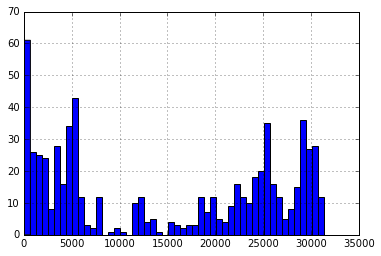

In [12]:
BES_clean.count().hist(bins=50)

In [13]:
columns_to_drop = BES_clean.columns[BES_clean.count()<10000]
columns_to_drop

Index(['partyIdSqueeze', 'partyIdSqueezeW9', 'ukCitizen', 'euCitizen',
       'commonwealthCitizen', 'otherCitizen', 'postalTurnout', 'euRefVotePost',
       'euRefVoteSqueeze', 'scottishness',
       ...
       'selfOccSuperviseLastW9', 'selfOccOrgSizeLastW9',
       'selfOccEmployeesLastW9', 'speakWelsh', 'selfNumEmployees',
       'selfNumEmployeesLast', 'fatherNumEmployees', 'motherNumEmployees',
       'subjectHE', 'subjectHECurrent'],
      dtype='object', length=297)

In [14]:
# BES_clean_full = BES_clean.drop(columns_to_drop,axis=1)
BES_clean_full = BES_clean

0.25    271.0
0.50    335.0
0.75    362.0
dtype: float64

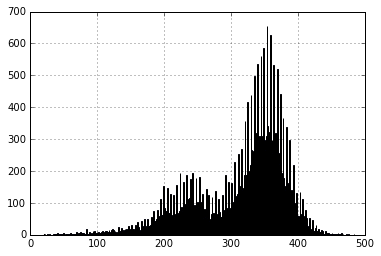

In [15]:
# some of the responders are shit!
BES_clean_full.count(axis=1).hist(bins=367)
BES_clean_full.count(axis=1).quantile([0.25,.5,.75])

In [16]:
BES_clean_full = BES_clean_full.apply(lambda x: x.cat.codes)


In [17]:
BES_clean_full.stack().value_counts()

-1      10986190
 0       2959078
 1       2217037
 2       1461362
 3       1110207
 4        675034
 5        364068
 6        287516
 7        183653
 10       170027
 8        150241
 9         72365
 15        21263
 14        10389
 17         8447
 12         8321
 13         8073
 11         7494
 16         6517
 50         3950
 40         3872
 24         3824
 18         3624
 51         3507
 45         3299
 48         3175
 19         3102
 20         2987
 42         2897
 49         2685
          ...   
 379          35
 252          35
 235          35
 311          35
 356          35
 343          34
 316          34
 374          34
 232          33
 306          32
 234          31
 359          31
 305          30
 290          27
 362          27
 352          27
 315          27
 342          27
 256          26
 209          26
 279          24
 354          24
 280          24
 213          23
 312          22
 335          22
 210          21
 272          

In [18]:
def set_missing_values(val):
    if val == -1:
        val = np.nan
    return val
# note - this will change the columns to float type (can't put nans in a int column)

In [19]:
BES_clean_full = BES_clean_full.applymap(set_missing_values)

In [20]:
BES_clean_full.stack().value_counts()

0.0      2959078
1.0      2217037
2.0      1461362
3.0      1110207
4.0       675034
5.0       364068
6.0       287516
7.0       183653
10.0      170027
8.0       150241
9.0        72365
15.0       21263
14.0       10389
17.0        8447
12.0        8321
13.0        8073
11.0        7494
16.0        6517
50.0        3950
40.0        3872
24.0        3824
18.0        3624
51.0        3507
45.0        3299
48.0        3175
19.0        3102
20.0        2987
42.0        2897
49.0        2685
52.0        2660
          ...   
356.0         35
235.0         35
379.0         35
311.0         35
252.0         35
316.0         34
374.0         34
343.0         34
232.0         33
306.0         32
234.0         31
359.0         31
305.0         30
342.0         27
352.0         27
315.0         27
362.0         27
290.0         27
209.0         26
256.0         26
354.0         24
280.0         24
279.0         24
213.0         23
312.0         22
335.0         22
210.0         21
272.0         

,otherCitizen,partyContactOtherParty,partyContactNone,partyContactPC_6,reasonNotRegistered_none,locusControl,changeIssue1W9,passports_99W9,locusControlW9,conLeaderLikeW9
0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0
2,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7,NaN,0.0,0.0,NaN,NaN,NaN,0.0,1.0,NaN,0.0
8,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,0.0
9,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0


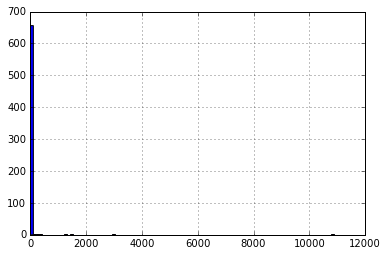

In [21]:
# any zero variance columns?
BES_clean_full.var().hist(bins=100)
BES_clean_full[BES_clean_full.columns[BES_clean_full.var()<.01]]

In [22]:
# add in the personality variables
t = [s for s in list(BES.columns) if "personality".lower() in s.lower()]
t

['personality_agreeableness',
 'personality_conscientiousness',
 'personality_extraversion',
 'personality_neuroticism',
 'personality_openness']

In [23]:
BES[t].count()
# Pretty decent % of missing values

personality_agreeableness        28969
personality_conscientiousness    28969
personality_extraversion         28970
personality_neuroticism          28969
personality_openness             28969
dtype: int64

In [24]:
BES[t].stack().value_counts()
# well behaved set of values!

5.0     38364
6.0     23836
7.0     18950
3.0     15102
8.0     13528
2.0      9817
4.0      6464
1.0      6313
10.0     5328
9.0      3840
0.0      3304
dtype: int64

In [25]:
clean_feature_set = pd.concat([ BES[t], BES_clean_full ], axis=1)

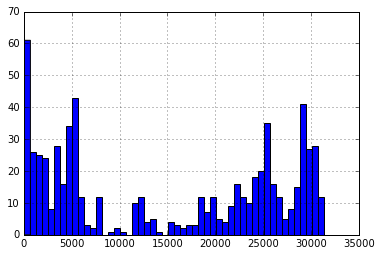

In [26]:
clean_feature_set.count(axis=0).hist(bins=50)

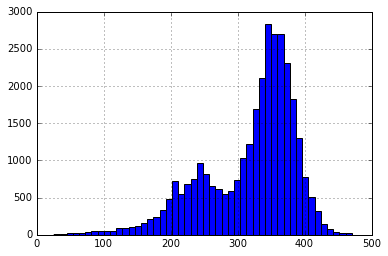

In [27]:
clean_feature_set.count(axis=1).hist(bins=50)

In [28]:
# corr = clean_feature_set.corr()
# corr["euRefVote"].sort_values()

In [29]:
# corr["euRefVote"]["al2"]

In [30]:
#clean_feature_set[~clean_feature_set["euRefVote"].isnull()]

# These variables
# reasonNotRegistered_none             NaN
# locusControl                         NaN
# changeIssue1W9                       NaN
# locusControlW9                       NaN
# conLeaderLikeW9                      NaN

In [31]:
# dimensionality reduction
# first we try PCA to see what the major axes of variation in the data are
# then LDA to see what they are with respect to the euRefVote

In [32]:
# How to get a dataset with as small a percentage of missing values as possible?
# Only look at England
# Only consider people who came back with a clear yes/no on the EURefVote

In [33]:
print( clean_feature_set["euRefVote"].value_counts() )
# Leave the EU/Stay in the EU/Would not vote/Don't know
a = clean_feature_set["euRefVote"]==2.0
clean_feature_set["euRefVote"][clean_feature_set["euRefVote"]==2.0] = np.nan
print( clean_feature_set["euRefVote"].value_counts() )

1.0    14803
0.0    14262
2.0      444
Name: euRefVote, dtype: int64
1.0    14803
0.0    14262
Name: euRefVote, dtype: int64


C:\ANACON~1\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
clean_feature_set.shape

(31409, 669)

In [35]:
clean_feature_set["euRefVote"].count()

29065

In [36]:
eu_non_answerers = clean_feature_set["euRefVote"][clean_feature_set["euRefVote"].isnull()].index
eu_non_answerers
clean_feature_set["euRefVote"][eu_non_answerers]
clean_feature_set_eu = clean_feature_set.drop(eu_non_answerers)

In [37]:
clean_feature_set_eu.shape

(29065, 669)

In [38]:
# non_england = clean_feature_set_eu["country"][ (clean_feature_set_eu["country"]==1) | (clean_feature_set_eu["country"]==2)].index
# non_england
# print( len (non_england))
# clean_feature_set_eu["country"][non_england]
# clean_feature_set_eu_eng = clean_feature_set_eu.drop(non_england)

# ## ~6000+ people with a missing value for country!

In [39]:
# clean_feature_set_eu_eng["country"].count()

In [40]:
# import gc
# gc.collect()

In [41]:
rows = clean_feature_set_eu.shape[0]
cols = clean_feature_set_eu.shape[1]
rows,cols

(29065, 669)

In [42]:
# a = clean_feature_set_eu_eng["country"][ clean_feature_set_eu_eng["age"].isnull() ]
# a.shape

In [43]:
((rows - clean_feature_set_eu.count())/rows).sort_values()

gender                              0.000000
turkey                              0.000000
euRefVote                           0.000000
riskTaking                          0.000000
profile_newspaper_readership_201    0.000000
profile_oslaua                      0.000000
age                                 0.000000
polAttention                        0.004782
euRefInterest                       0.005333
britishness                         0.008464
registered                          0.009255
englishness                         0.010012
housing                             0.012937
efficacyUnderstand                  0.014003
efficacyPolCare                     0.014244
efficacyEU                          0.015035
europeanness                        0.016549
changeCostLive                      0.017272
regSatisfaction                     0.017444
monarch                             0.017685
profile_household_children          0.021056
lr4                                 0.022123
profile_re

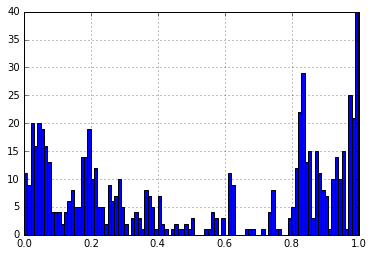

In [44]:
((rows - clean_feature_set_eu.count())/rows).sort_values().hist(bins=100)

In [45]:
a = ((rows - clean_feature_set_eu.count())/rows)
#print(a[a>.5])
#print(len(a[a>.5]))
b = clean_feature_set_eu.columns[a<.5]
print(b)

Index(['personality_agreeableness', 'personality_conscientiousness',
       'personality_extraversion', 'personality_neuroticism',
       'personality_openness', 'country', 'generalElectionVote',
       'generalElectionVoteW9', 'partyId', 'partyIdEU',
       ...
       'subjClass', 'polKnowMiliband', 'polKnowClegg', 'polKnowOsborne',
       'polKnowMay', 'edlevel', 'profile_turnout_2015',
       'profile_past_vote_2015', 'lr_scale', 'al_scale'],
      dtype='object', length=336)


In [46]:
cols_new = len(b)

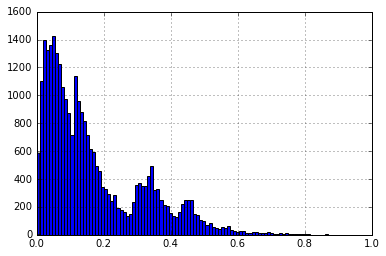

In [47]:
((cols_new - clean_feature_set_eu[b].count(axis=1))/cols_new).sort_values().hist(bins=100)

In [48]:
# english_rows = clean_feature_set[clean_feature_set.country==0].shape[0]

In [49]:
# ((english_rows - clean_feature_set[clean_feature_set.country==0].count())/english_rows).sort_values()

In [50]:
# clean_feature_set.country.value_counts()

In [51]:
clean_feature_set_eu_reduced = clean_feature_set_eu[b]
clean_feature_set_eu_reduced

,personality_agreeableness,personality_conscientiousness,personality_extraversion,personality_neuroticism,personality_openness,country,generalElectionVote,generalElectionVoteW9,partyId,partyIdEU,...,subjClass,polKnowMiliband,polKnowClegg,polKnowOsborne,polKnowMay,edlevel,profile_turnout_2015,profile_past_vote_2015,lr_scale,al_scale
0,7.0,10.0,5.0,5.0,5.0,0.0,6.0,6.0,1.0,0.0,...,2.0,2.0,1.0,0.0,3.0,NaN,0.0,1.0,1.0,16.0
1,6.0,6.0,5.0,4.0,5.0,0.0,1.0,1.0,0.0,2.0,...,NaN,2.0,1.0,0.0,3.0,4.0,0.0,0.0,15.0,12.0
2,5.0,6.0,1.0,5.0,5.0,1.0,8.0,NaN,3.0,2.0,...,2.0,2.0,1.0,0.0,3.0,2.0,0.0,3.0,1.0,20.0
3,7.0,10.0,1.0,3.0,3.0,2.0,2.0,5.0,8.0,1.0,...,1.0,2.0,1.0,0.0,3.0,4.0,0.0,1.0,6.0,7.0
4,5.0,7.0,2.0,3.0,3.0,0.0,1.0,NaN,0.0,2.0,...,NaN,2.0,1.0,0.0,3.0,4.0,0.0,0.0,10.0,20.0
5,3.0,5.0,0.0,10.0,2.0,0.0,1.0,1.0,0.0,0.0,...,1.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,12.0,12.0
6,3.0,5.0,3.0,5.0,5.0,0.0,1.0,NaN,0.0,2.0,...,1.0,2.0,1.0,0.0,3.0,4.0,0.0,0.0,15.0,18.0
7,5.0,6.0,2.0,6.0,5.0,1.0,4.0,4.0,8.0,1.0,...,2.0,2.0,1.0,0.0,3.0,5.0,0.0,3.0,0.0,3.0
8,3.0,8.0,5.0,5.0,3.0,0.0,6.0,6.0,8.0,0.0,...,2.0,2.0,1.0,0.0,3.0,1.0,0.0,5.0,0.0,NaN
9,6.0,7.0,3.0,3.0,5.0,2.0,6.0,6.0,0.0,1.0,...,1.0,2.0,1.0,0.0,3.0,3.0,0.0,5.0,8.0,12.0


In [52]:
non_zero_var_columns = clean_feature_set_eu_reduced.columns[clean_feature_set_eu_reduced.var()!=0]
non_zero_var_columns # 3 zero variance columns
clean_feature_set_eu_reduced = clean_feature_set_eu_reduced[non_zero_var_columns]

In [53]:
clean_feature_set_eu_reduced.to_hdf("../BES_analysis_data/clean_feature_set_reduced.hdf","clean_feature_set_reduced")
del clean_feature_set_eu_reduced
clean_feature_set_eu_reduced = pd.read_hdf("../BES_analysis_data/clean_feature_set_reduced.hdf")

In [54]:
from sklearn.preprocessing import Imputer
clean_feature_set_nonan = Imputer(missing_values="NaN", strategy="mean", axis=0).fit_transform(clean_feature_set_eu_reduced)

In [55]:
from sklearn.preprocessing import StandardScaler
clean_feature_set_std = StandardScaler().fit_transform(clean_feature_set_nonan)
clean_feature_set_std = pd.DataFrame(clean_feature_set_std,
                                     columns = clean_feature_set_eu_reduced.columns,
                                     index = clean_feature_set_eu_reduced.index)

In [56]:
clean_feature_set_std.to_hdf("../BES_analysis_data/clean_feature_set_std.hdf","clean_feature_set_std")
del clean_feature_set_std
clean_feature_set_std = pd.read_hdf("../BES_analysis_data/clean_feature_set_std.hdf")

In [57]:
clean_feature_set_std

,personality_agreeableness,personality_conscientiousness,personality_extraversion,personality_neuroticism,personality_openness,country,generalElectionVote,generalElectionVoteW9,partyId,partyIdEU,...,subjClass,polKnowMiliband,polKnowClegg,polKnowOsborne,polKnowMay,edlevel,profile_turnout_2015,profile_past_vote_2015,lr_scale,al_scale
0,0.536850,1.789271,0.408082,6.356034e-01,-3.431217e-01,-5.700712e-01,1.590308,1.887594,-0.551136,-1.522595e+00,...,1.050850,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,3.499016e-16,-0.313804,-0.458945,-1.216636,0.716759
1,-0.054042,-0.452553,0.408082,1.590917e-01,-3.431217e-01,-5.700712e-01,-0.995448,-1.089568,-0.899994,1.505018e+00,...,0.000000,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,7.908237e-01,-0.313804,-1.022314,2.288601,-0.231437
2,-0.644933,-0.452553,-1.496808,6.356034e-01,-3.431217e-01,1.214301e+00,2.624610,0.000000,0.146581,1.505018e+00,...,1.050850,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,-7.849928e-01,-0.313804,0.667794,-1.216636,1.664954
3,0.536850,1.789271,-1.496808,-3.174200e-01,-1.561834e+00,2.998674e+00,-0.478297,1.292162,1.890872,-8.788236e-03,...,-0.372872,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,7.908237e-01,-0.313804,-0.458945,0.035234,-1.416681
4,-0.644933,0.107903,-1.020586,-3.174200e-01,-1.561834e+00,-5.700712e-01,-0.995448,0.000000,-0.899994,1.505018e+00,...,0.000000,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,7.908237e-01,-0.313804,-1.022314,1.036730,1.664954
5,-1.826715,-1.013009,-1.973031,3.018162e+00,-2.171190e+00,-5.700712e-01,-0.995448,-1.089568,-0.899994,-1.522595e+00,...,-0.372872,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,7.908237e-01,-0.313804,-1.022314,1.537479,-0.231437
6,-1.826715,-1.013009,-0.544363,6.356034e-01,-3.431217e-01,-5.700712e-01,-0.995448,0.000000,-0.899994,1.505018e+00,...,-0.372872,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,7.908237e-01,-0.313804,-1.022314,2.288601,1.190856
7,-0.644933,-0.452553,-1.020586,1.112115e+00,-3.431217e-01,1.214301e+00,0.556005,0.696729,1.890872,-8.788236e-03,...,1.050850,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,1.578732e+00,-0.313804,0.667794,-1.467010,-2.364876
8,-1.826715,0.668359,0.408082,6.356034e-01,-1.561834e+00,-5.700712e-01,1.590308,1.887594,1.890872,-1.522595e+00,...,1.050850,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,-1.572901e+00,-0.313804,1.794533,-1.467010,0.000000
9,-0.054042,0.107903,-0.544363,-3.174200e-01,-3.431217e-01,2.998674e+00,1.590308,1.887594,-0.899994,-8.788236e-03,...,-0.372872,9.978350e-02,-1.556139e-01,-0.235470,1.112093e-01,2.915450e-03,-0.313804,1.794533,0.535982,-0.231437


In [67]:
corr = clean_feature_set.corr()

In [68]:
eu_ref_corr = corr["euRefVote"].sort_values()

In [69]:
eu_ref_corr[eu_ref_corr>.2]

age                            0.205110
labPriorities_noneW9           0.207336
ukipPriorities_crimeW9         0.209038
likeConW9                      0.209504
efficacyNoMatter               0.210023
Age                            0.210336
conUnitedW9                    0.211830
immigSNP                       0.215101
tuSupport                      0.217522
al4                            0.219206
ptvConW9                       0.219372
ethno4W9                       0.223349
satDemEngW9                    0.227671
EUContactLeaveNone             0.231962
ukipUnited                     0.235276
femaleEquality                 0.236494
satDemUKW9                     0.237897
monarch                        0.245233
ldPriorities_noneW9            0.245576
ukipPriorities_schoolW9        0.246590
efficacyPolCareW9              0.249572
generalElectionVote            0.250068
certaintyUKLeave               0.250566
bestOnMII                      0.251578
ukipPriorities_costLiveW9      0.256158


In [61]:
eu_ref_corr["femaleEquality"]

0.23158478584830883

In [62]:
eu_ref_corr["gayEquality"]

0.32088407646199141

In [63]:
corr["euRefVote"]["al2"]

0.42280860790397889

In [64]:
corr["euRefVote"]["al_scale"]

0.43470436947520946

In [65]:
corr["euRefVote"]["lr_scale"]

0.04891709431207196

In [66]:
(eu_ref_corr["germanyFairShare"],
eu_ref_corr["franceFairShare"],
eu_ref_corr["britainFairShare"])

(0.23795676994700554, 0.27160161111910586, -0.46628829642009972)